In [17]:
import pandas as pd
import os
import glob
import numpy as np
import statistics as stats
import scipy
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
from collections import Counter, defaultdict
import random
from tensorflow import keras
from scipy.stats import linregress, pearsonr
from src.tf_tools.cnn_regression import MCDropout
# 3.10.4

In [18]:
def one_hot_seqs(seqs) -> np.array:
    static_1hotmap = {
        'A' : np.array([1,0,0,0]),
        'a' : np.array([1,0,0,0]),
        'C' : np.array([0,1,0,0]),
        'c' : np.array([0,1,0,0]),
        'G' : np.array([0,0,1,0]),
        'g' : np.array([0,0,1,0]),
        'T' : np.array([0,0,0,1]),
        't' : np.array([0,0,0,1]),
    }
    onehot_seqs = []
    for seq in seqs:
        onehot_seqs.append(
            [static_1hotmap[seq[i]] if seq[i] in static_1hotmap.keys() else static_1hotmap[random.choice(['A','C','G','T'])] for i in range(len(seq))]
        )
    return np.stack(onehot_seqs)

In [24]:
activity_df = pd.read_csv("Data/activity.csv", index_col=0)
retinopathy_df = pd.read_csv("Data/retinopathy.csv", index_col=0)
x_ret = one_hot_seqs(retinopathy_df['sequence'])
y_ret = retinopathy_df['expression_log2'].values

test_df = activity_df[activity_df['test_set']]
len(test_df)
x_test = one_hot_seqs(test_df['sequence'])

y_test = test_df['expression_log2'].values


In [20]:
folder = "Runs/originalResNet_11772796"
folds = np.arange(5)+1
model_name = "cnn_model.keras"

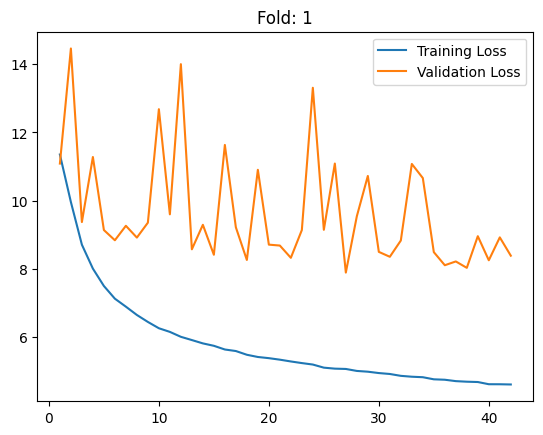

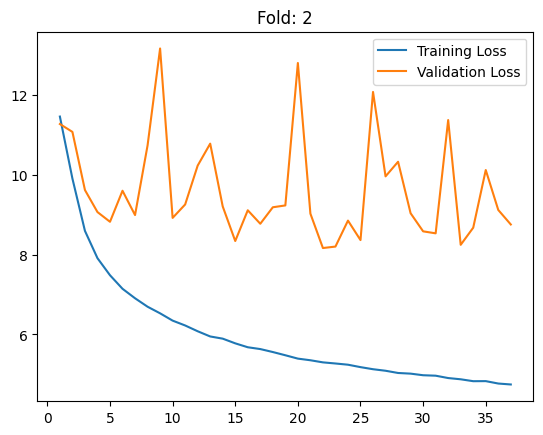

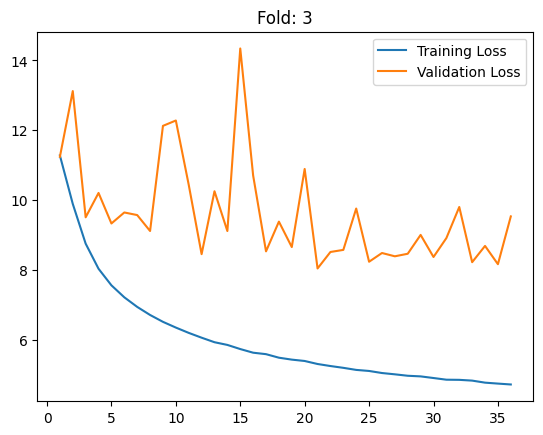

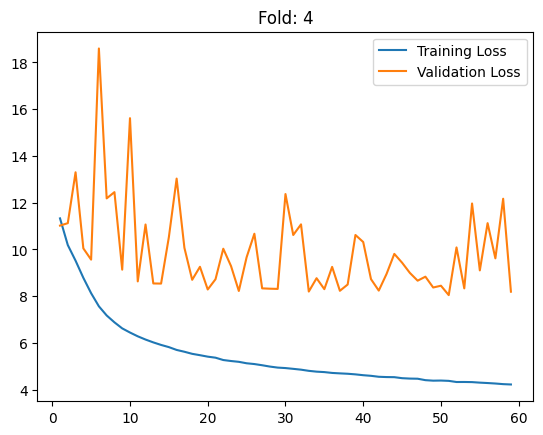

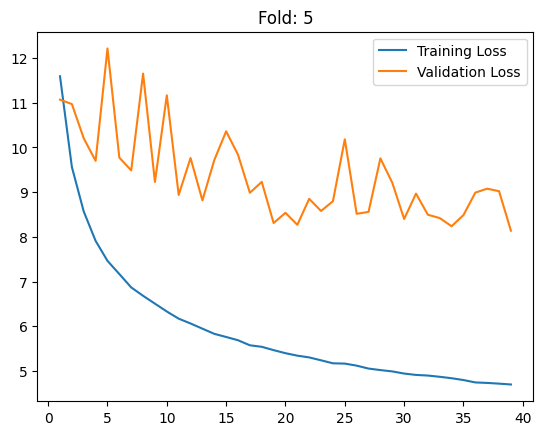

In [21]:
for fold in folds:
    file = os.path.join(folder,str(fold),"live_log.csv")
    df = pd.read_csv(file, index_col=0)
    epochs = np.array(df.index)+1
    plt.clf()
    plt.plot(epochs, df['loss'], label='Training Loss')
    plt.plot(epochs,df['val_loss'], label = 'Validation Loss')
    plt.title("Fold: " + str(fold))
    plt.legend()
    plt.show()
    

In [22]:
model = keras.models.load_model(folder+"/1/cnn_model.keras", custom_objects={'MCDropout':MCDropout})

In [ ]:
samples = 2
preds = []
ret_preds = []

for _ in range(samples):
    preds.append(model(x_test).flatten())
    ret_preds.append(model(x_ret))
    
preds = np.stack(preds)
ret_preds = np.stack(ret_preds)

In [26]:
linregress(np.mean(preds,axis=0), y_test)

LinregressResult(slope=0.8449594087838811, intercept=-0.12295357452095507, rvalue=0.577434280655724, pvalue=0.0, stderr=0.011775654775104812, intercept_stderr=0.02743395077366082)